In [3]:
import pandas as pd 
train=pd.read_csv('/kaggle/input/microsoft-malware-prediction/train.csv',low_memory=False)

In [4]:
train=train.sample(1000000,random_state=42)

In [5]:
train.head()

MachineIdentifier   ProductName EngineVersion  \
8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
236059   06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

              AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
8427007  4.18.1807.18075  1.273.1234.0       0               7.0   
8829090  4.18.1807.18075  1.273.1282.0       0               7.0   
2731904   4.9.10586.1106   1.273.781.0       0               7.0   
1359513  4.18.1807.18075  1.275.1639.0       0               7.0   
236059   4.18.1807.18075   1.275.511.0       0               7.0   

         IsSxsPassiveMode  DefaultBrowsersIdentifier  \
8427007                 0                        NaN   
8829090                 0                        NaN   
2731904                 0                        NaN   
1359513                 0                        NaN   
236059                  0                        NaN   

         AVProductStatesIdentifier  ...  Census_FirmwareVersionIdentifier  \
8427007                    53447.0  ...                           19951.0   
8829090                    53447.0  ...                           48753.0   
2731904                    46781.0  ...                           33111.0   
1359513                    53447.0  ...                           48473.0   
236059                     47238.0  ...                            4343.0   

         Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
8427007                           0                      NaN   
8829090                           0                      0.0   
2731904                           1                      0.0   
1359513                           1                      NaN   
236059                            1                      NaN   

         Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
8427007                     0.0                      0                    0   
8829090                     0.0                      0                    0   
2731904                     0.0                      1                    1   
1359513                     0.0                      0                    0   
236059                      0.0                      1                    0   

         Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
8427007                                      0.0           0.0   
8829090                                      0.0           1.0   
2731904                                      0.0           0.0   
1359513                                      0.0           0.0   
236059                                       0.0           1.0   

        Wdft_RegionIdentifier HasDetections  
8427007                  11.0             1  
8829090                   3.0             0  
2731904                  15.0             0  
1359513                  15.0             1  
236059                   13.0             1  

[5 rows x 83 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 8427007 to 4963145
Data columns (total 83 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   MachineIdentifier                                  1000000 non-null  object 
 1   ProductName                                        1000000 non-null  object 
 2   EngineVersion                                      1000000 non-null  object 
 3   AppVersion                                         1000000 non-null  object 
 4   AvSigVersion                                       1000000 non-null  object 
 5   IsBeta                                             1000000 non-null  int64  
 6   RtpStateBitfield                                   996386 non-null   float64
 7   IsSxsPassiveMode                                   1000000 non-null  int64  
 8   DefaultBrowsersIdentifier                          48589 non-

In [7]:
train.describe()

IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
count  1000000.000000     996386.000000    1000000.000000   
mean         0.000008          6.846598          0.017231   
std          0.002828          1.022228          0.130131   
min          0.000000          0.000000          0.000000   
25%          0.000000          7.000000          0.000000   
50%          0.000000          7.000000          0.000000   
75%          0.000000          7.000000          0.000000   
max          1.000000         35.000000          1.000000   

       DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
count               48589.000000              995987.000000   
mean                 1657.858342               47829.217378   
std                   997.822206               14052.192569   
min                     1.000000                   3.000000   
25%                   788.000000               49480.000000   
50%                  1632.000000               53447.000000   
75%                  2345.000000               53447.000000   
max                  3209.000000               70492.000000   

       AVProductsInstalled  AVProductsEnabled          HasTpm  \
count        995987.000000      995987.000000  1000000.000000   
mean              1.327213           1.020745        0.987820   
std               0.523403           0.166724        0.109689   
min               1.000000           0.000000        0.000000   
25%               1.000000           1.000000        1.000000   
50%               1.000000           1.000000        1.000000   
75%               2.000000           1.000000        1.000000   
max               7.000000           5.000000        1.000000   

       CountryIdentifier  CityIdentifier  ...  \
count     1000000.000000   963695.000000  ...   
mean          108.014328    81236.437161  ...   
std            63.048195    48908.781729  ...   
min             1.000000        7.000000  ...   
25%            51.000000    36825.000000  ...   
50%            97.000000    82373.000000  ...   
75%           162.000000   123582.000000  ...   
max           222.000000   167959.000000  ...   

       Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
count                     981962.000000              1000000.000000   
mean                       33020.190130                    0.485622   
std                        21214.492163                    0.499793   
min                           10.000000                    0.000000   
25%                        13154.000000                    0.000000   
50%                        33070.000000                    0.000000   
75%                        52427.000000                    1.000000   
max                        72094.000000                    1.000000   

       Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
count            365582.000000           998159.000000         1000000.000000   
mean                  0.000003                0.007113               0.125687   
std                   0.001654                0.084039               0.331496   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                0.000000               0.000000   
75%                   0.000000                0.000000               0.000000   
max                   1.000000                1.000000               1.000000   

       Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  \
count       1000000.000000                            991961.000000   
mean              0.038046                                 0.057517   
std               0.191307                                 0.232829   
min               0.000000                                 0.000000   
25%               0.000000                                 0.000000   
50%               0.000000                                 0.000000   
75

In [8]:
train.describe().T

count          mean  \
IsBeta                                             1000000.0  8.000000e-06   
RtpStateBitfield                                    996386.0  6.846598e+00   
IsSxsPassiveMode                                   1000000.0  1.723100e-02   
DefaultBrowsersIdentifier                            48589.0  1.657858e+03   
AVProductStatesIdentifier                           995987.0  4.782922e+04   
AVProductsInstalled                                 995987.0  1.327213e+00   
AVProductsEnabled                                   995987.0  1.020745e+00   
HasTpm                                             1000000.0  9.878200e-01   
CountryIdentifier                                  1000000.0  1.080143e+02   
CityIdentifier                                      963695.0  8.123644e+04   
OrganizationIdentifier                              690840.0  2.485972e+01   
GeoNameIdentifier                                   999980.0  1.696898e+02   
LocaleEnglishNameIdentifier                        1000000.0  1.227192e+02   
OsBuild                                            1000000.0  1.572319e+04   
OsSuite                                            1000000.0  5.751184e+02   
IsProtected                                         996006.0  9.455666e-01   
AutoSampleOptIn                                    1000000.0  2.900000e-05   
SMode                                               939923.0  4.574843e-04   
IeVerIdentifier                                     993419.0  1.266467e+02   
Firewall                                            989696.0  9.783823e-01   
UacLuaenable                                        998804.0  1.372443e+01   
Census_OEMNameIdentifier                            989162.0  2.220290e+03   
Census_OEMModelIdentifier                           988393.0  2.390781e+05   
Census_ProcessorCoreCount                           995359.0  3.991549e+00   
Census_ProcessorManufacturerIdentifier              995359.0  4.531603e+00   
Census_ProcessorModelIdentifier                     995355.0  2.371700e+03   
Census_PrimaryDiskTotalCapacity                     994094.0  5.132442e+05   
Census_SystemVolumeTotalCapacity                    994094.0  3.775430e+05   
Census_HasOpticalDiskDrive                         1000000.0  7.721100e-02   
Census_TotalPhysicalRAM                             990947.0  6.119374e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches   994763.0  1.667820e+01   
Census_InternalPrimaryDisplayResolutionHorizontal   994775.0  1.548185e+03   
Census_InternalPrimaryDisplayResolutionVertical     994775.0  8.980630e+02   
Census_InternalBatteryNumberOfCharges               969840.0  1.122832e+09   
Census_OSBuildNumber                               1000000.0  1.583811e+04   
Census_OSBuildRevision                             1000000.0  9.691945e+02   
Census_OSInstallLanguageIdentifier                  993377.0  1.459720e+01   
Census_OSUILocaleIdentifier                        1000000.0  6.040393e+01   
Census_IsPortableOperatingSystem                   1000000.0  5.250000e-04   
Census_IsFlightingInternal                          169723.0  1.767586e-05   
Census_IsFlightsDisabled                            981994.0  9.165025e-06   
Census_ThresholdOptIn                               364729.0  2.522421e-04   
Census_FirmwareManufacturerIdentifier               979342.0  4.030351e+02   
Census_FirmwareVersionIdentifier                    981962.0  3.302019e+04   
Census_IsSecureBootEnabled                         1000000.0  4.856220e-01   
Census_IsWIMBootEnabled                             365582.0  2.735364e-06   
Census_IsVirtualDevice                              998159.0  7.113095e-03   
Census_IsTouchEnabled                              1000000.0  1.256870e-01   
Census_IsPenCapable                                1000000.0  3.804600e-02   
Census_IsAlwaysOnAlwaysConnectedCapable             991961.0  5.751738e-02   
Wdft_IsGamer                                        966019.0  2.834623e-01   

In [9]:
train.isna().sum().sort_values(ascending=True)

MachineIdentifier                   0
ProductName                         0
EngineVersion                       0
HasTpm                              0
LocaleEnglishNameIdentifier         0
                                ...  
Census_InternalBatteryType     710503
Census_IsFlightingInternal     830277
DefaultBrowsersIdentifier      951411
Census_ProcessorClass          995825
PuaMode                        999742
Length: 83, dtype: int64

In [10]:
columns_na = ['PuaMode', 'Census_ProcessorClass', 'DefaultBrowsersIdentifier',
'Census_IsFlightingInternal', 'Census_InternalBatteryType','Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled','SmartScreen','OrganizationIdentifier'            ]
train.drop(columns=columns_na, inplace=True)

In [11]:
for column in train.columns:
    print(f"Value counts for column '{column}':")
    print(train[column].value_counts())
    print("="*50)  # Separator for readability


Value counts for column 'MachineIdentifier':
MachineIdentifier
59dfe73ff46be3256ac63c8283f7e8e4    1
48d69ad597a3a84c69435ffd93bd6149    1
9344beeb93231c43f6f2fe1a3c71c8ce    1
c1750790f9b3dc872b8d44980dcb69a8    1
a3bda5608321ee5f559c45fffec44007    1
                                   ..
270a2e9d028144a4df12a9e3da79fba5    1
06ca8fa8d32c2abdc5b3577d676b3269    1
6c3ff3036d3ecc96729a615653742608    1
8ab73b7f8dbb0d0d57f54a8b4799e960    1
1c4ec21828b563afb6b0aa72ef88926d    1
Name: count, Length: 1000000, dtype: int64
Value counts for column 'ProductName':
ProductName
win8defender     989220
mse               10772
mseprerelease         6
scep                  1
fep                   1
Name: count, dtype: int64
Value counts for column 'EngineVersion':
EngineVersion
1.1.15200.1    431401
1.1.15100.1    411941
1.1.15000.2     29713
1.1.14901.4     23818
1.1.14600.4     18008
1.1.14800.3     15106
1.1.15300.6     13500
1.1.14104.0     10553
1.1.13504.0      7848
1.1.15300.5      7744
1.1.

In [12]:
columns_no_need=['MachineIdentifier','IsBeta','AutoSampleOptIn','Census_IsPortableOperatingSystem',
'Census_IsFlightsDisabled']
train.drop(columns=columns_no_need, inplace=True)

In [13]:
import matplotlib.pyplot as plt

def plot_column_dist(df):
    for column in df.columns:
        # Check if column has NaN values
        if df[column].isna().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[column]):
                # For numeric columns, plot a histogram
                plt.figure(figsize=(10, 6))
                plt.hist(df[column].dropna(), bins=30, edgecolor='black')
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()
            else:
                # For non-numeric columns, plot a bar chart
                plt.figure(figsize=(10, 6))
                df[column].value_counts().plot(kind='bar', edgecolor='black')
                plt.title(f'Value counts for {column}')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
                plt.show()


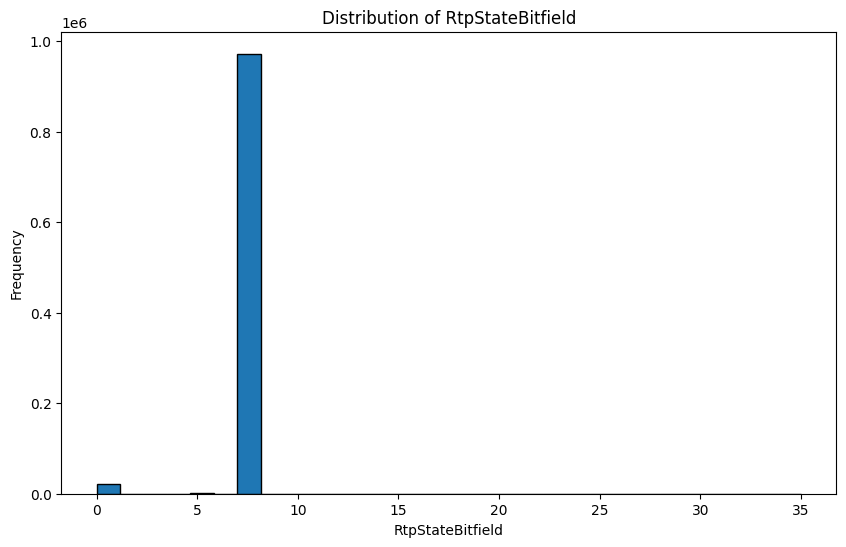

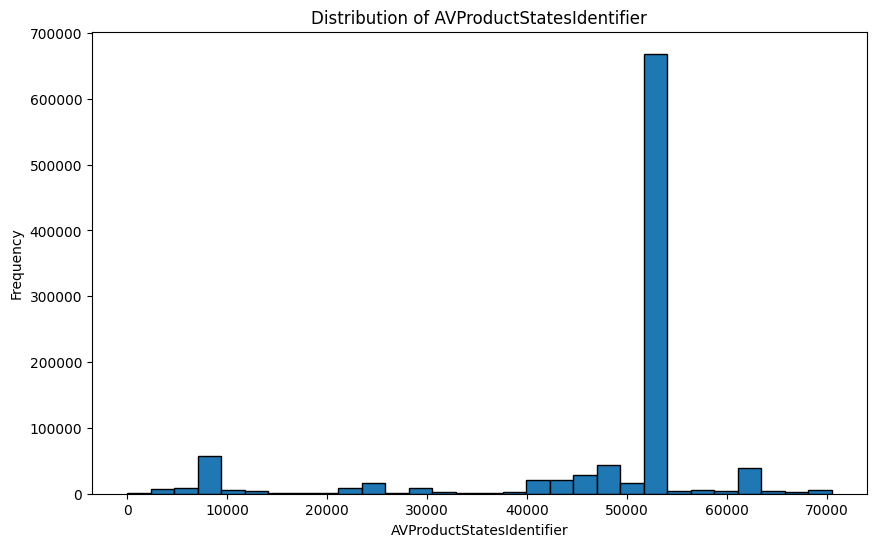

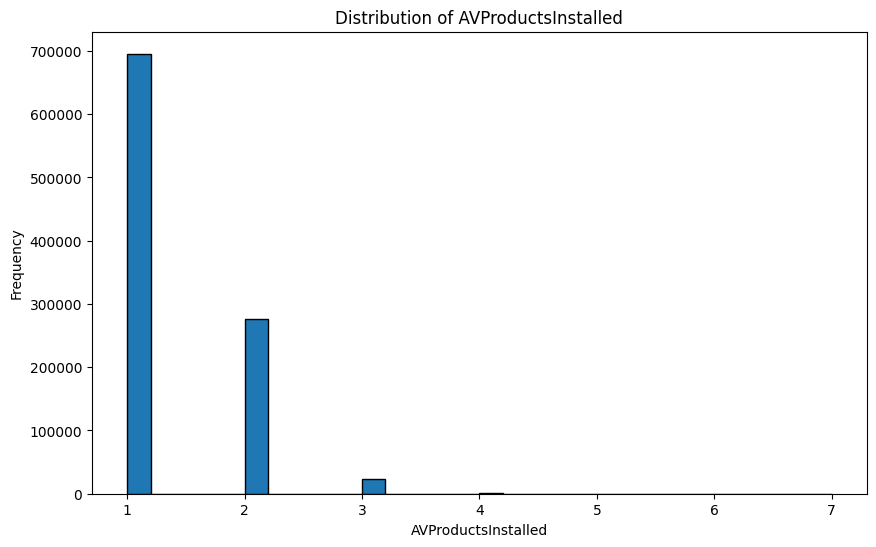

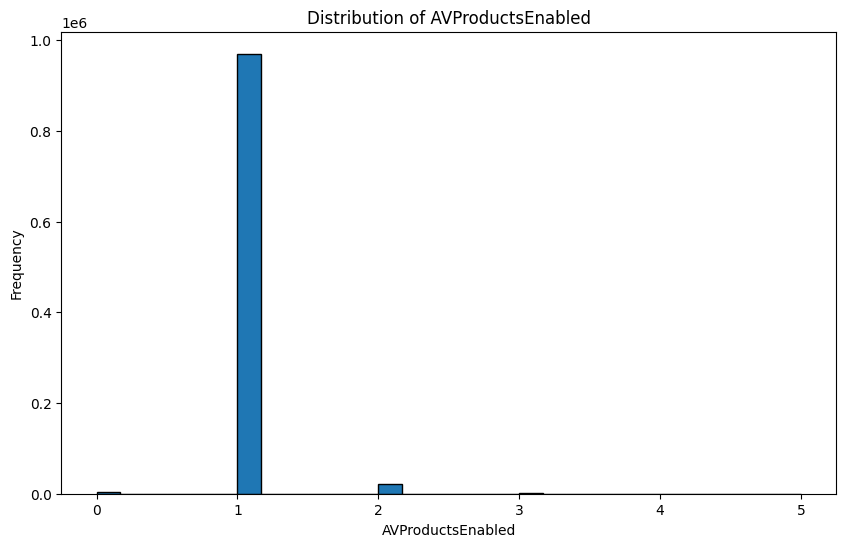

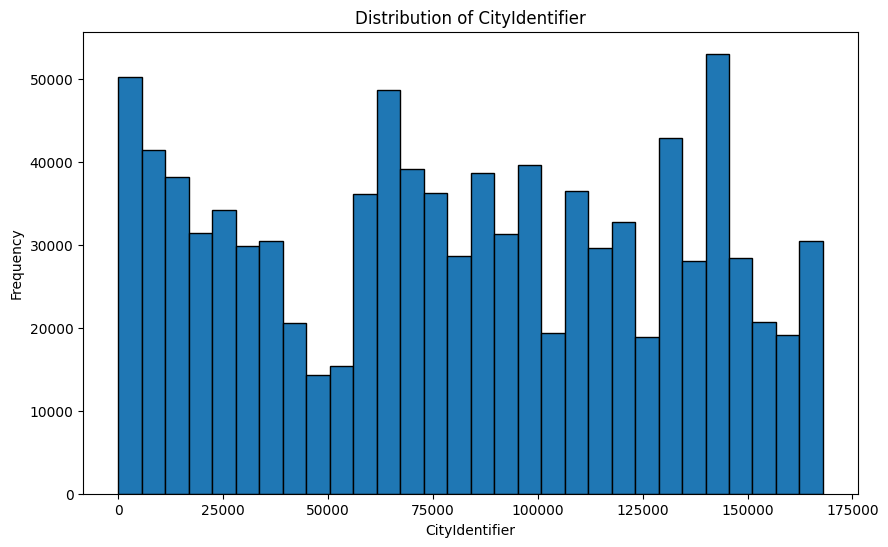

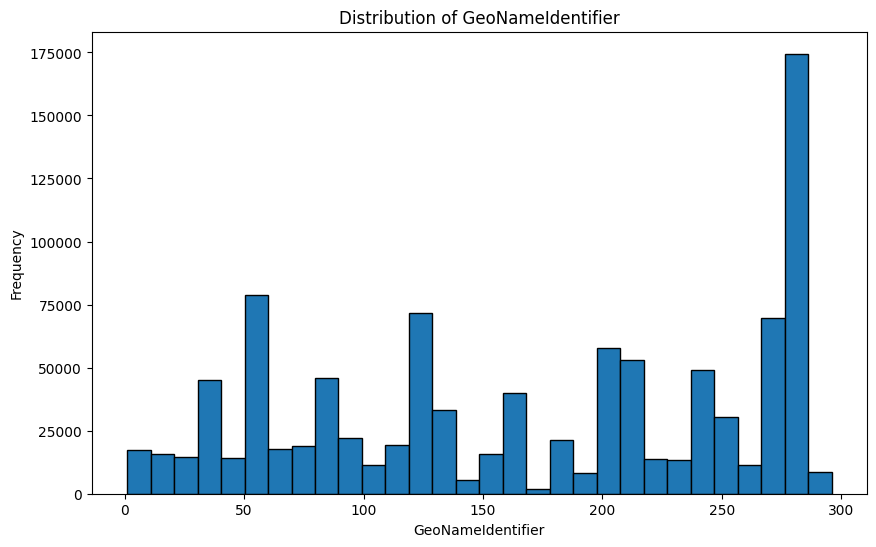

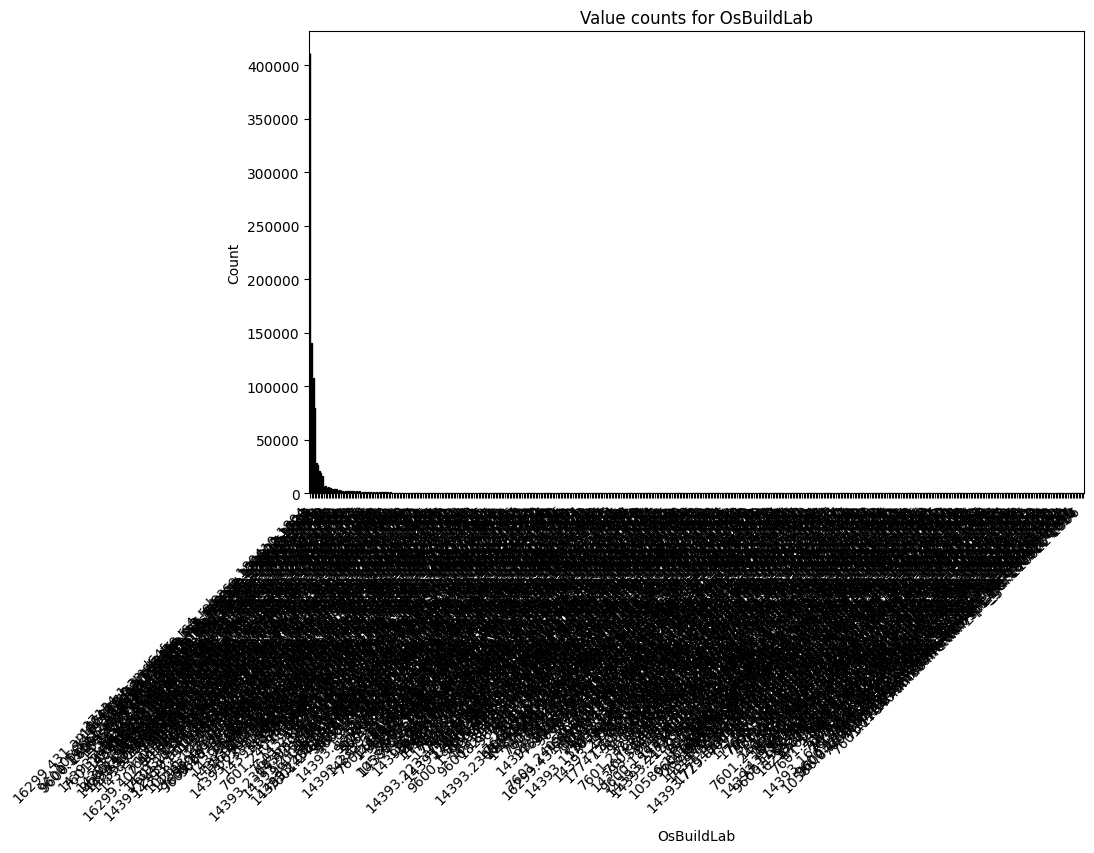

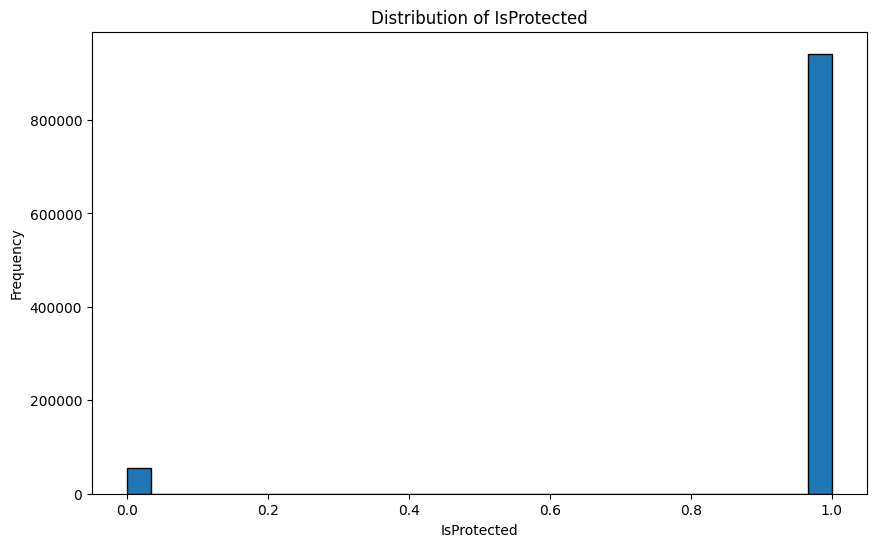

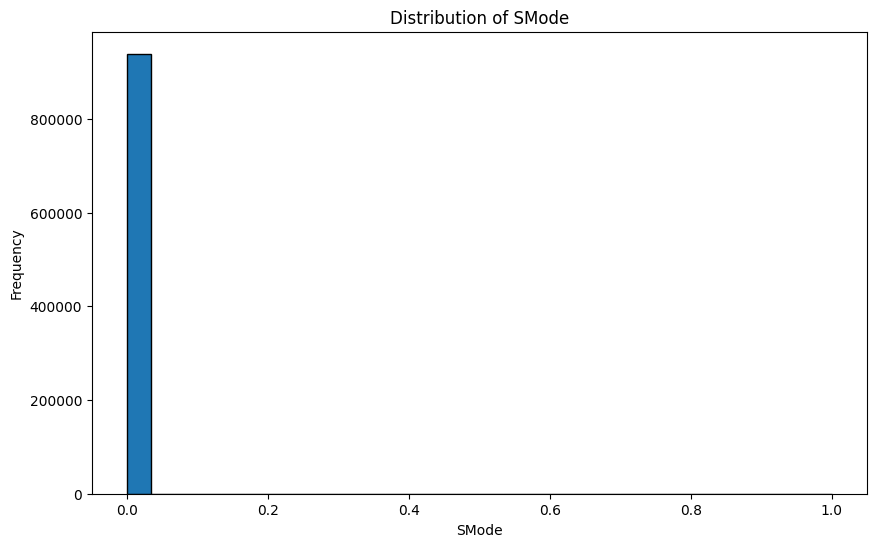

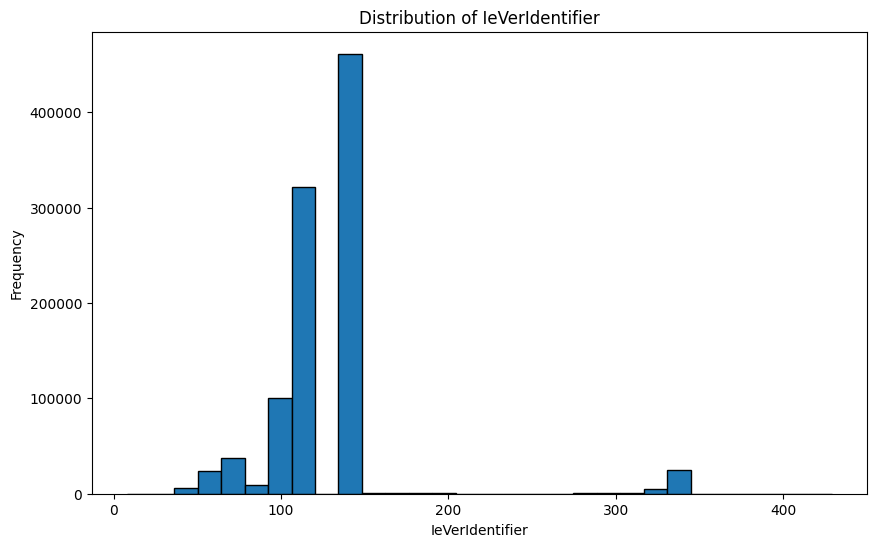

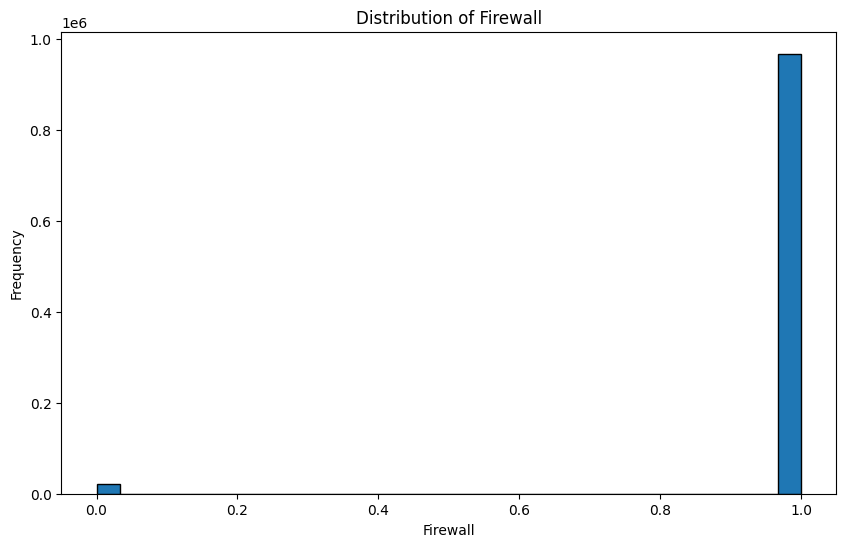

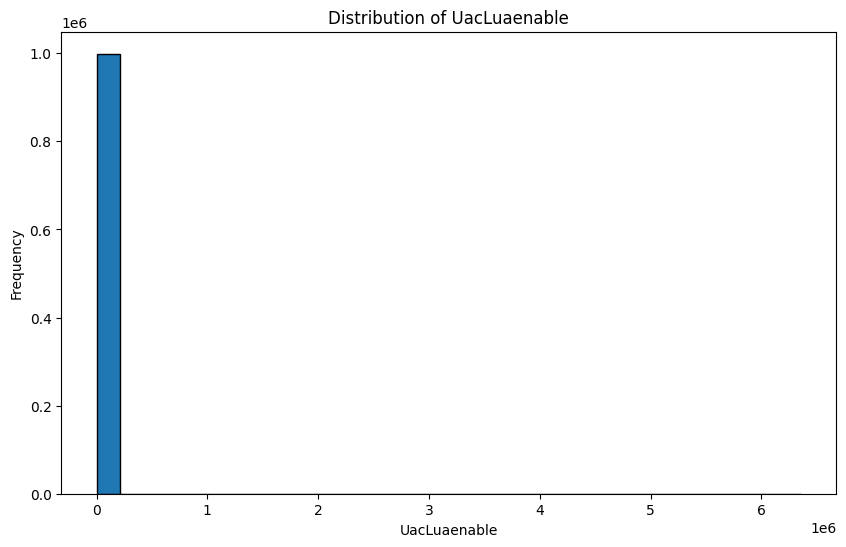

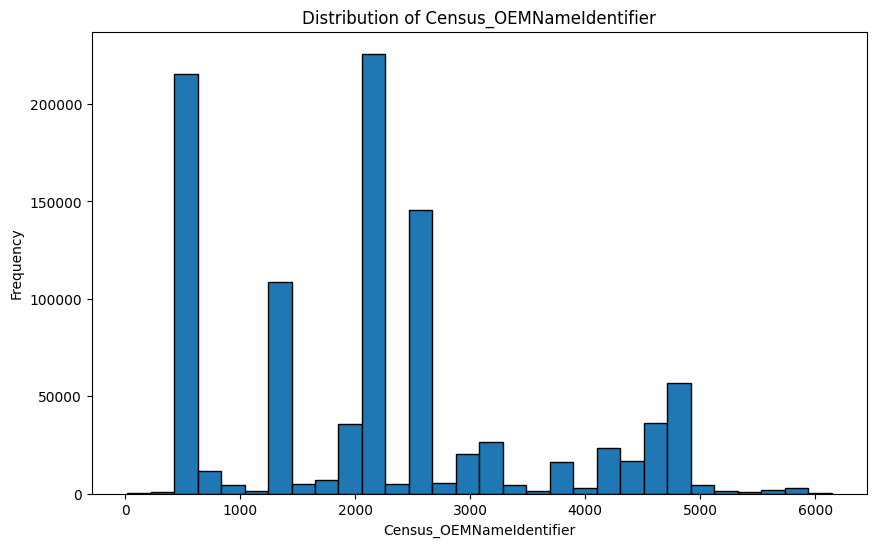

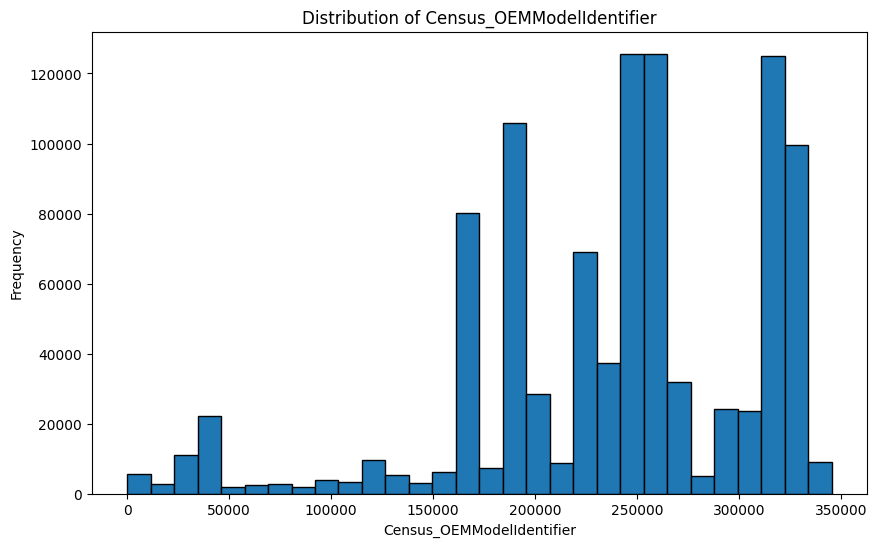

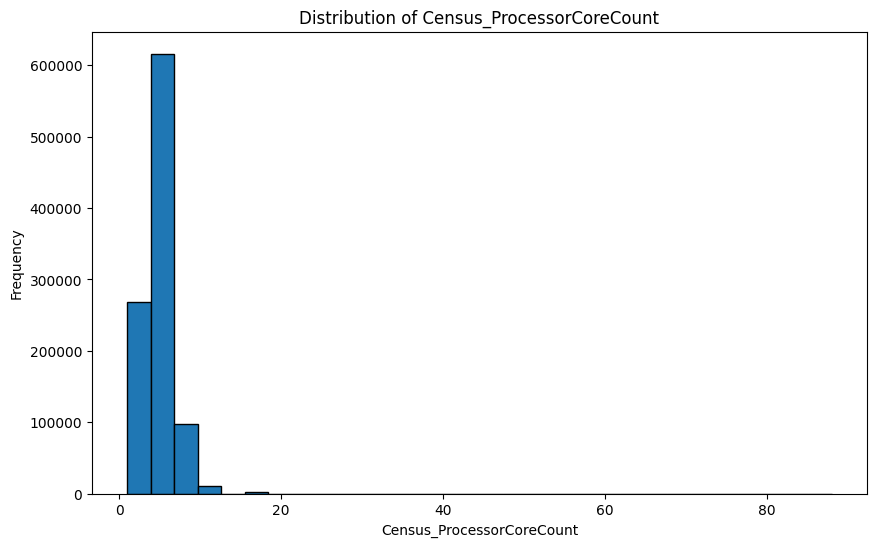

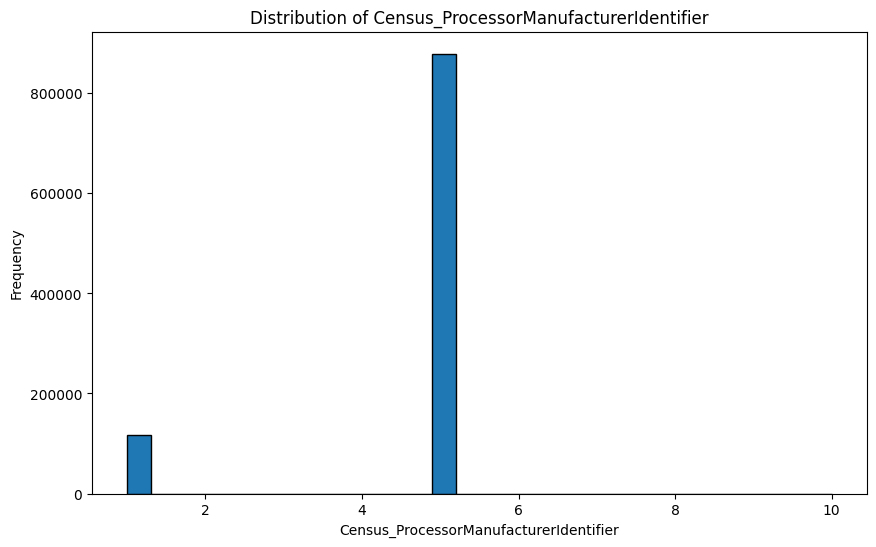

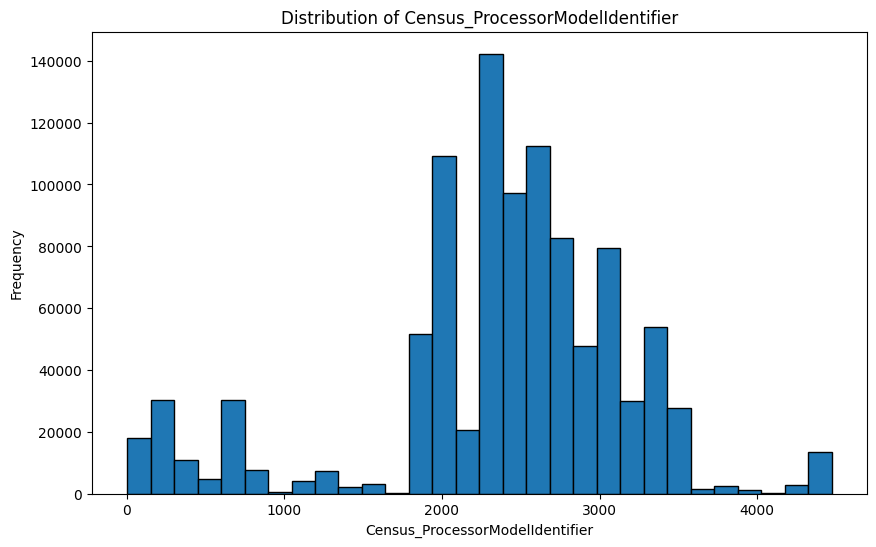

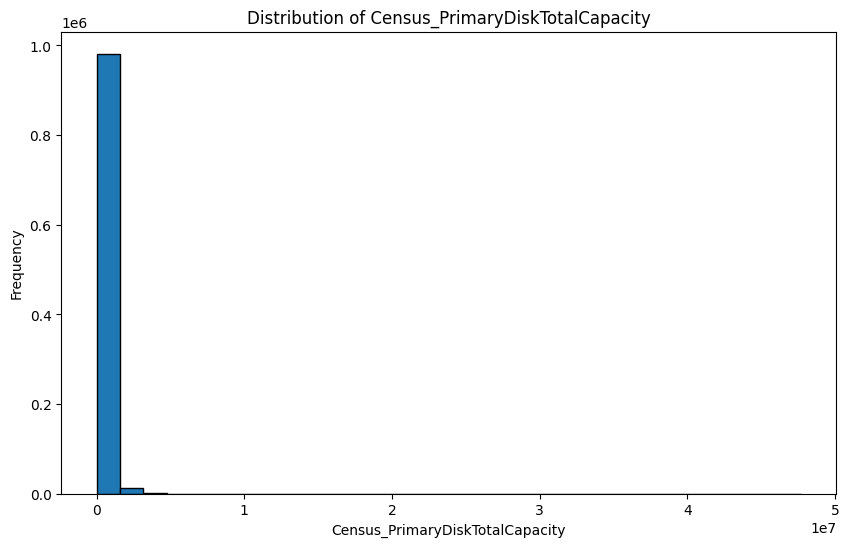

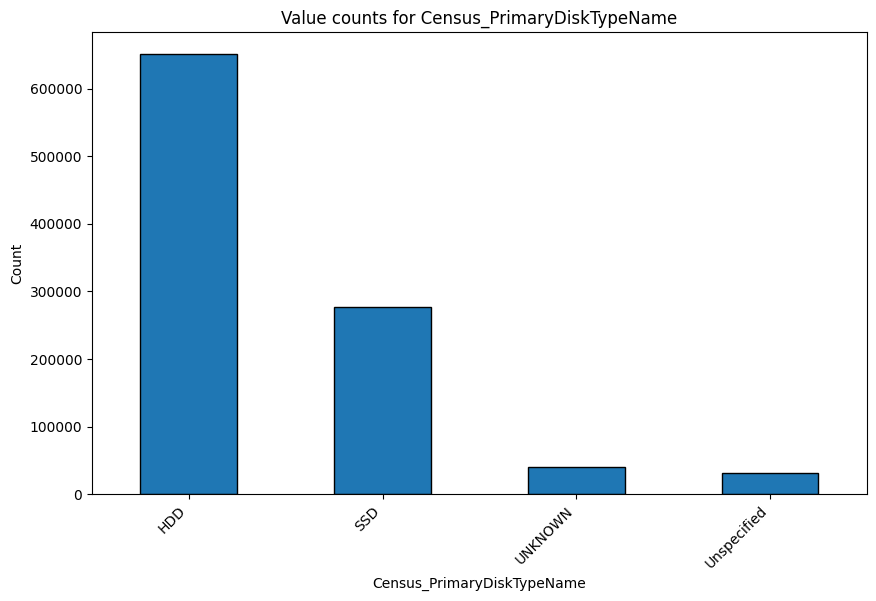

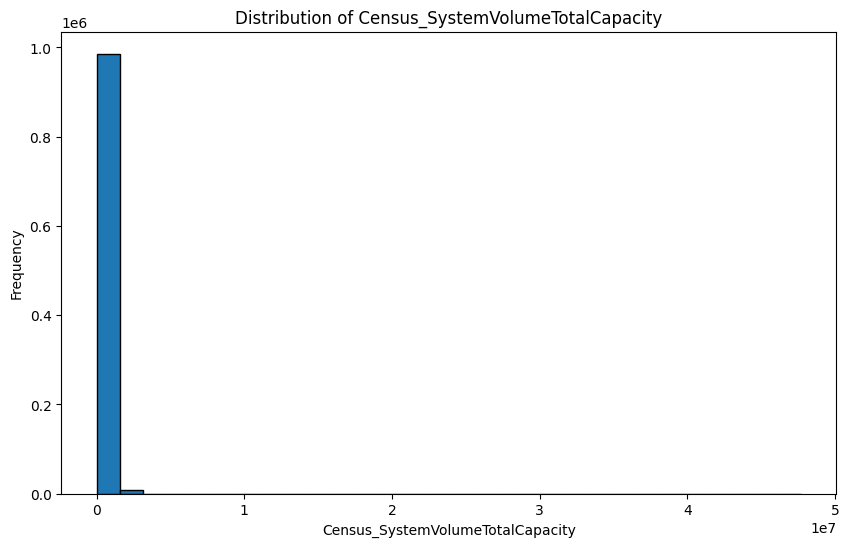

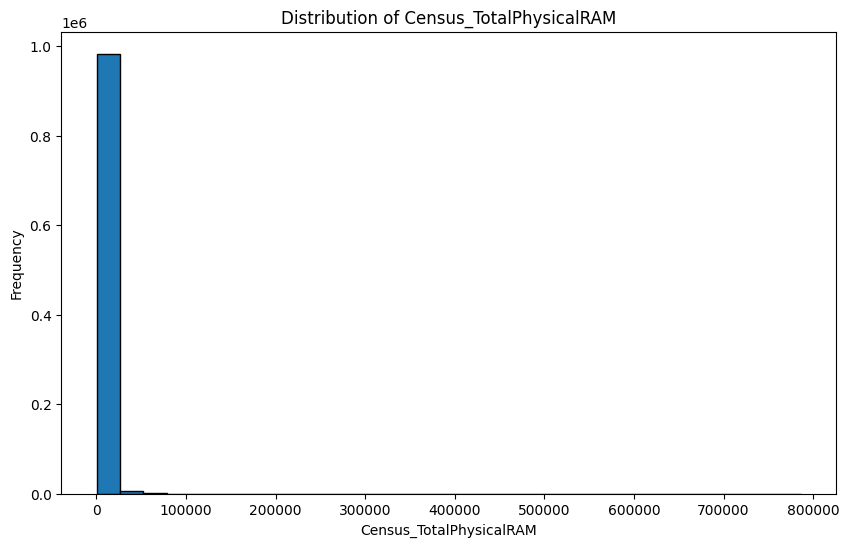

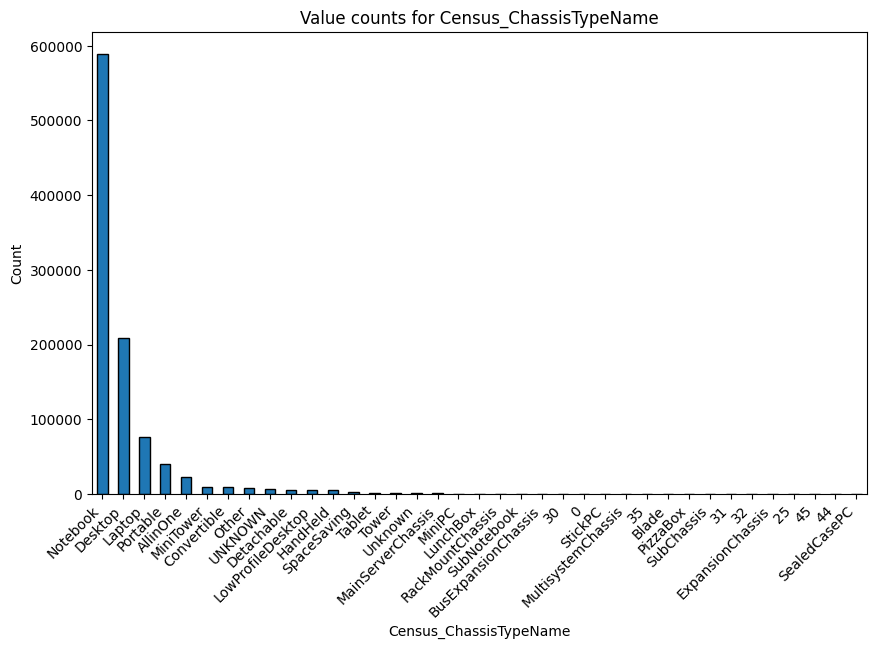

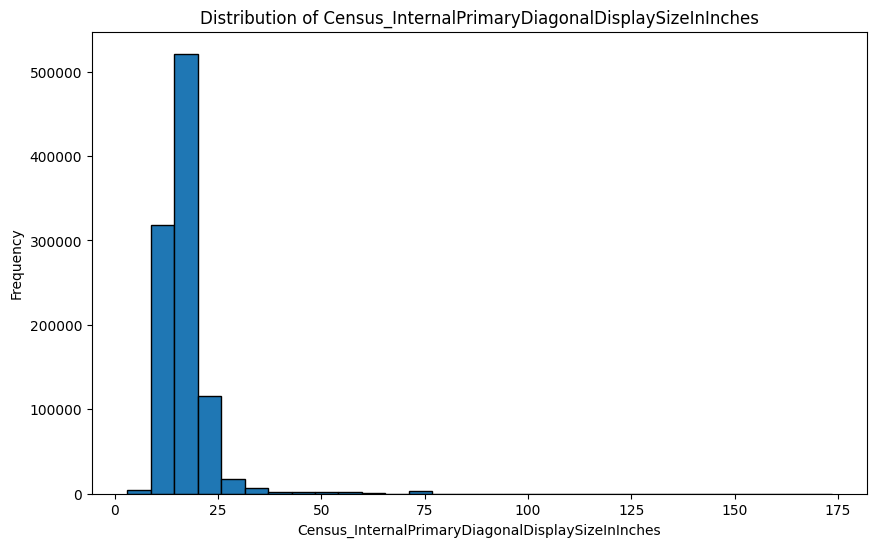

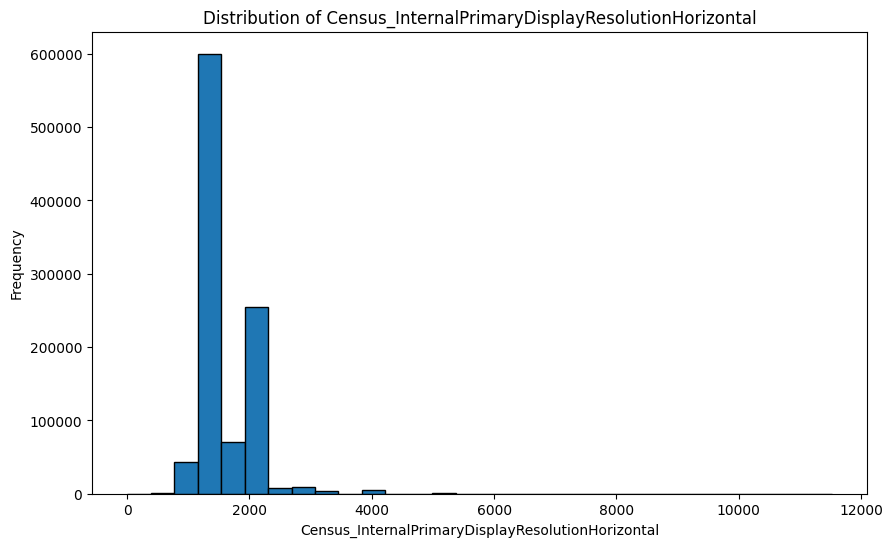

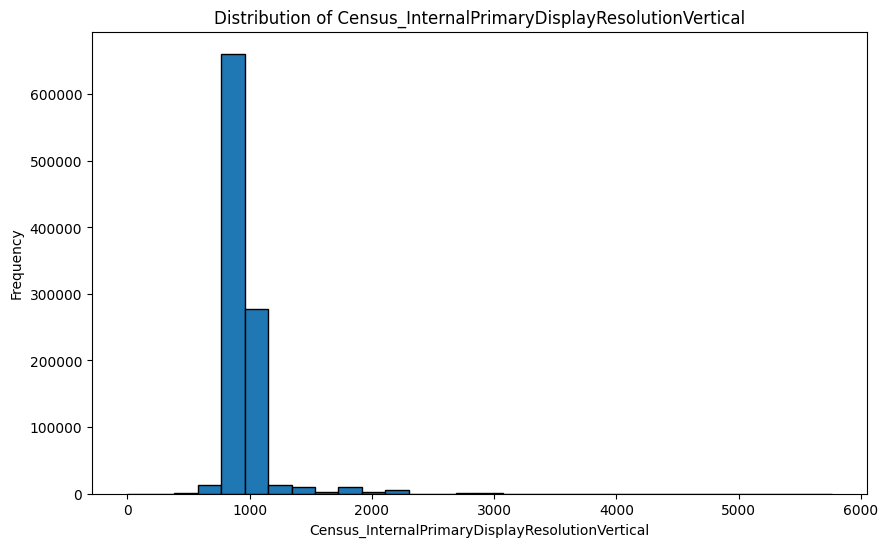

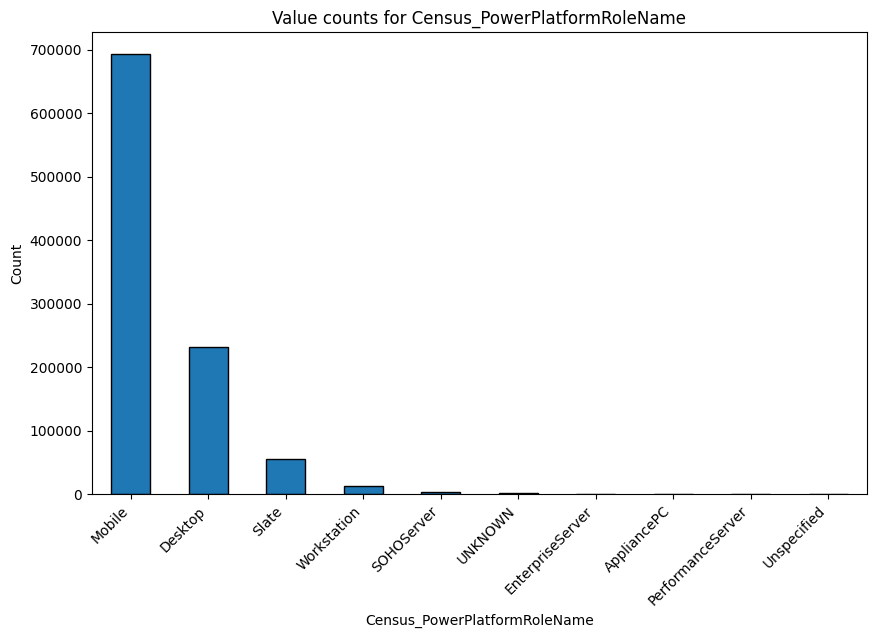

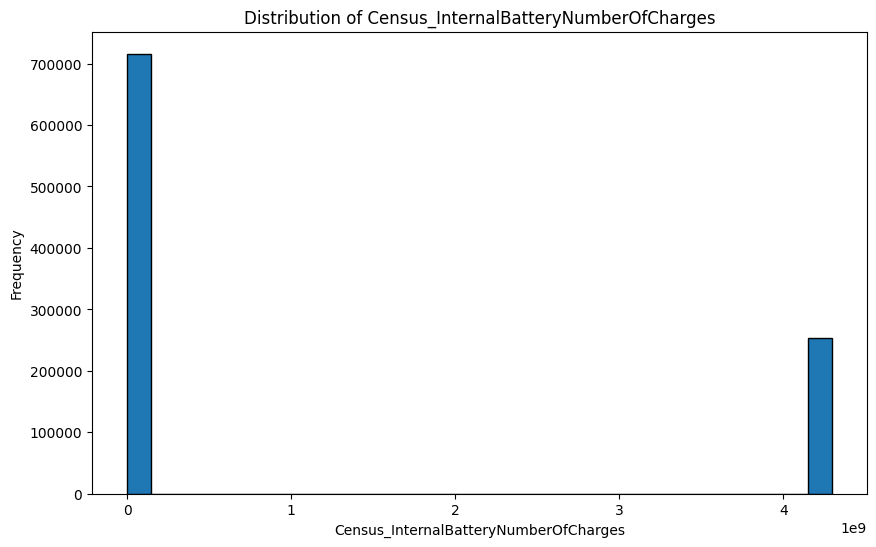

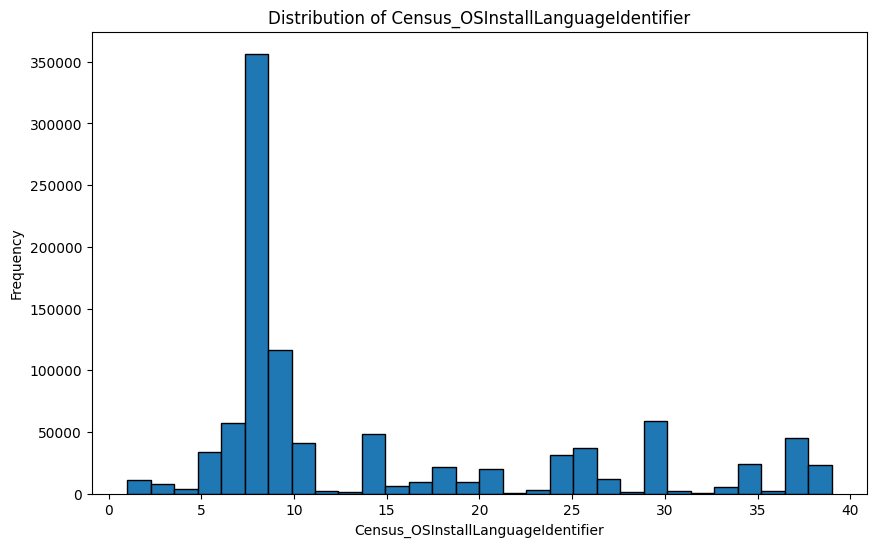

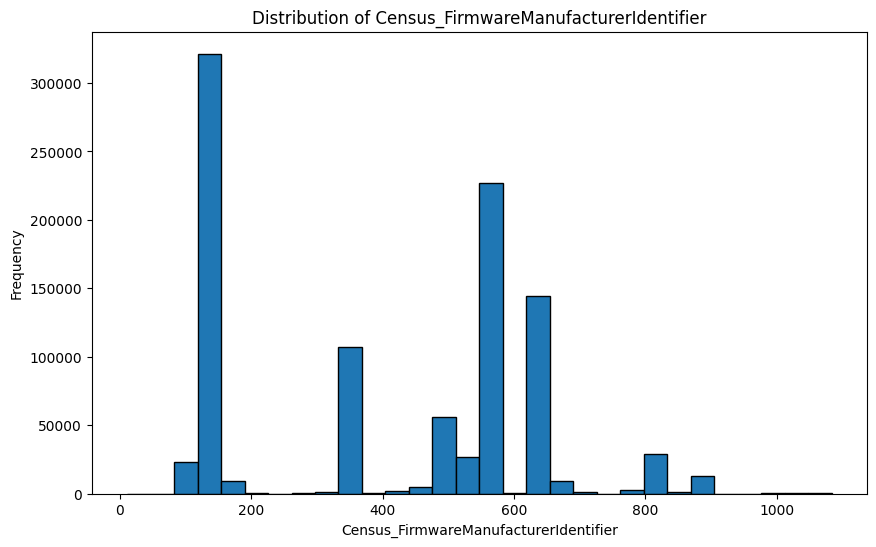

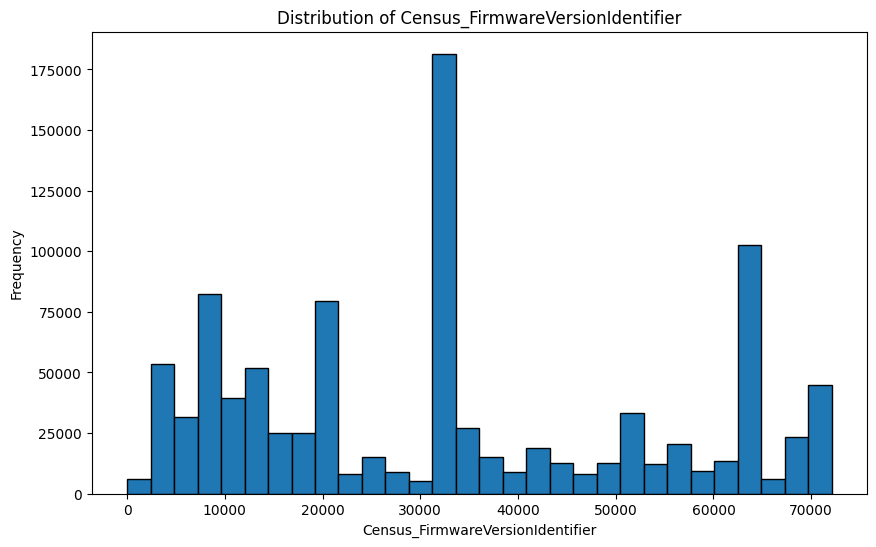

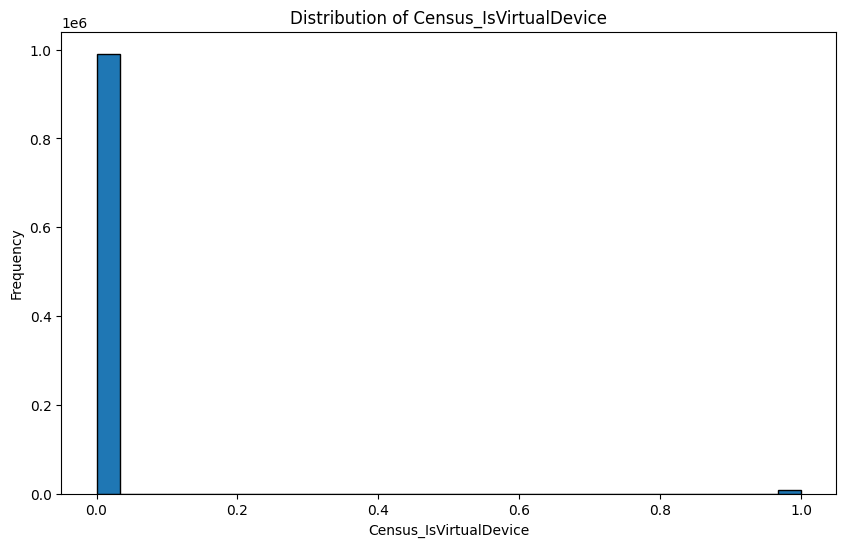

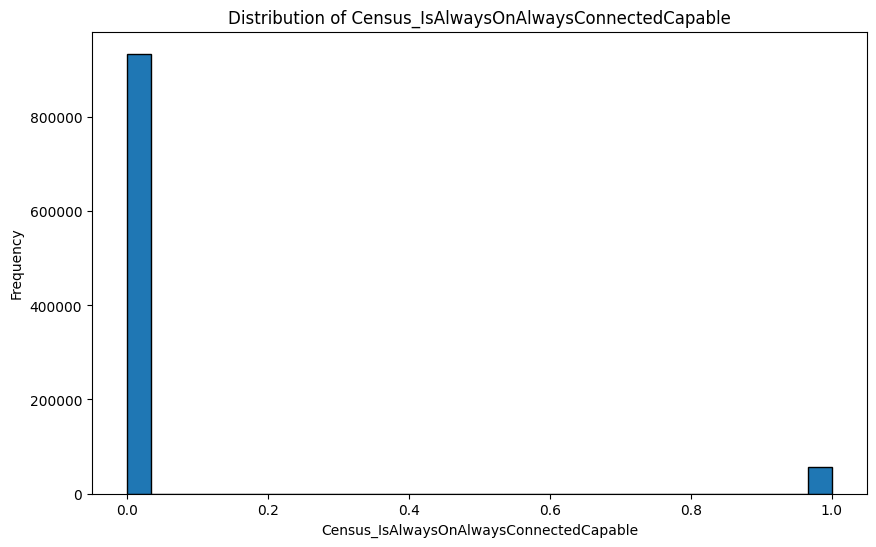

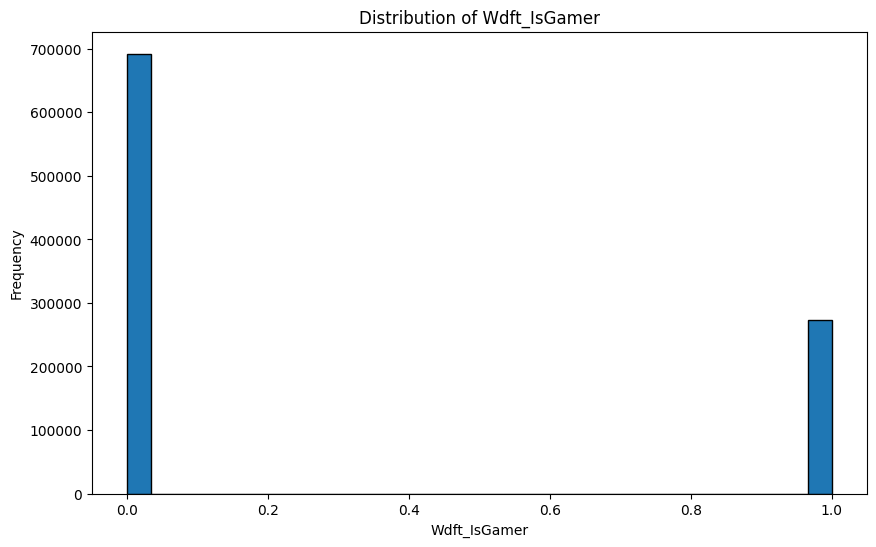

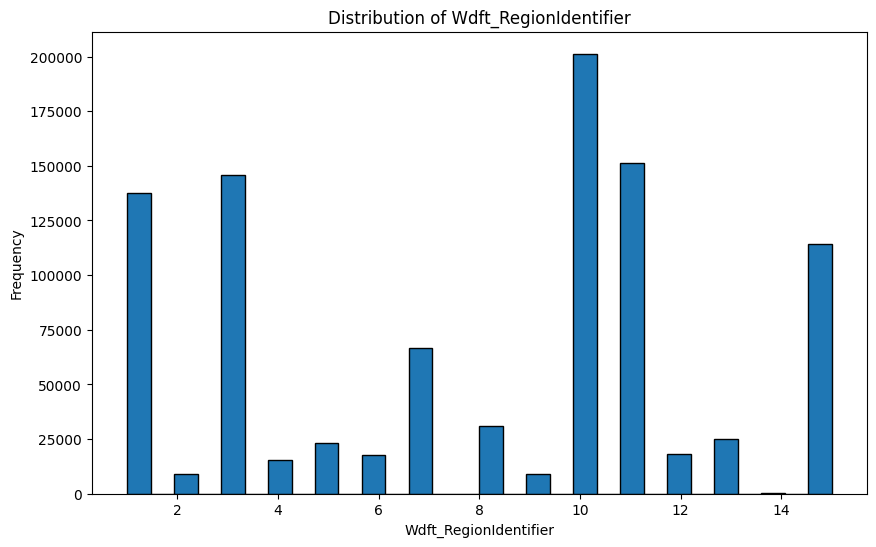

In [14]:
plot_column_dist(train)

In [15]:
train.describe().T

count          mean  \
RtpStateBitfield                                    996386.0  6.846598e+00   
IsSxsPassiveMode                                   1000000.0  1.723100e-02   
AVProductStatesIdentifier                           995987.0  4.782922e+04   
AVProductsInstalled                                 995987.0  1.327213e+00   
AVProductsEnabled                                   995987.0  1.020745e+00   
HasTpm                                             1000000.0  9.878200e-01   
CountryIdentifier                                  1000000.0  1.080143e+02   
CityIdentifier                                      963695.0  8.123644e+04   
GeoNameIdentifier                                   999980.0  1.696898e+02   
LocaleEnglishNameIdentifier                        1000000.0  1.227192e+02   
OsBuild                                            1000000.0  1.572319e+04   
OsSuite                                            1000000.0  5.751184e+02   
IsProtected                                         996006.0  9.455666e-01   
SMode                                               939923.0  4.574843e-04   
IeVerIdentifier                                     993419.0  1.266467e+02   
Firewall                                            989696.0  9.783823e-01   
UacLuaenable                                        998804.0  1.372443e+01   
Census_OEMNameIdentifier                            989162.0  2.220290e+03   
Census_OEMModelIdentifier                           988393.0  2.390781e+05   
Census_ProcessorCoreCount                           995359.0  3.991549e+00   
Census_ProcessorManufacturerIdentifier              995359.0  4.531603e+00   
Census_ProcessorModelIdentifier                     995355.0  2.371700e+03   
Census_PrimaryDiskTotalCapacity                     994094.0  5.132442e+05   
Census_SystemVolumeTotalCapacity                    994094.0  3.775430e+05   
Census_HasOpticalDiskDrive                         1000000.0  7.721100e-02   
Census_TotalPhysicalRAM                             990947.0  6.119374e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches   994763.0  1.667820e+01   
Census_InternalPrimaryDisplayResolutionHorizontal   994775.0  1.548185e+03   
Census_InternalPrimaryDisplayResolutionVertical     994775.0  8.980630e+02   
Census_InternalBatteryNumberOfCharges               969840.0  1.122832e+09   
Census_OSBuildNumber                               1000000.0  1.583811e+04   
Census_OSBuildRevision                             1000000.0  9.691945e+02   
Census_OSInstallLanguageIdentifier                  993377.0  1.459720e+01   
Census_OSUILocaleIdentifier                        1000000.0  6.040393e+01   
Census_FirmwareManufacturerIdentifier               979342.0  4.030351e+02   
Census_FirmwareVersionIdentifier                    981962.0  3.302019e+04   
Census_IsSecureBootEnabled                         1000000.0  4.856220e-01   
Census_IsVirtualDevice                              998159.0  7.113095e-03   
Census_IsTouchEnabled                              1000000.0  1.256870e-01   
Census_IsPenCapable                                1000000.0  3.804600e-02   
Census_IsAlwaysOnAlwaysConnectedCapable             991961.0  5.751738e-02   
Wdft_IsGamer                                        966019.0  2.834623e-01   
Wdft_RegionIdentifier                               966019.0  7.884174e+00   
HasDetections                                      1000000.0  4.996420e-01   

                                                            std     min  \
RtpStateBitfield                                   1.022228e+00     0.0   
IsSxsPassiveMode                                   1.301311e-01     0.0   
AVProductStatesIdentifier                          1.405219e+04     3.0   
AVProductsInstalled                                5.234032e-01     1.0   
AVProductsEnabled                                  1.667241e-01     0.0   
HasTpm                                             1.096889e-01     0.0   
CountryIdentifier  

In [16]:
columns_mean =['CityIdentifier','GeoNameIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier',
'Wdft_RegionIdentifier','Census_FirmwareVersionIdentifier','Census_FirmwareManufacturerIdentifier',
'Census_InternalPrimaryDisplayResolutionVertical','Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_ProcessorModelIdentifier']

columns_mode = ['AVProductStatesIdentifier','AVProductsInstalled','Census_IsAlwaysOnAlwaysConnectedCapable',
'Census_ProcessorCoreCount','Census_OSInstallLanguageIdentifier','Census_InternalBatteryNumberOfCharges',
'Census_InternalPrimaryDiagonalDisplaySizeInInches','IeVerIdentifier','Census_ProcessorCoreCount',
'IsProtected','Wdft_IsGamer','Census_ProcessorManufacturerIdentifier']

columns_biased = ['RtpStateBitfield','AVProductsEnabled','SMode','Firewall',
'UacLuaenable','Census_IsVirtualDevice','Census_TotalPhysicalRAM',
'Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity']

In [17]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')


In [18]:
train[columns_mean] = mean_imputer.fit_transform(train[columns_mean])

train[columns_mode] = mode_imputer.fit_transform(train[columns_mode])

train.drop(columns=columns_biased, inplace=True)

In [19]:
train.isna().sum()

ProductName                                             0
EngineVersion                                           0
AppVersion                                              0
AvSigVersion                                            0
IsSxsPassiveMode                                        0
AVProductStatesIdentifier                               0
AVProductsInstalled                                     0
HasTpm                                                  0
CountryIdentifier                                       0
CityIdentifier                                          0
GeoNameIdentifier                                       0
LocaleEnglishNameIdentifier                             0
Platform                                                0
Processor                                               0
OsVer                                                   0
OsBuild                                                 0
OsSuite                                                 0
OsPlatformSubR

In [20]:
train['Census_PrimaryDiskTypeName']=train['Census_PrimaryDiskTypeName'].fillna(value='Unspecified')

train['Census_PowerPlatformRoleName']=train['Census_PowerPlatformRoleName'].fillna(value='UNKNOWN')

train['Census_ChassisTypeName']=train['Census_ChassisTypeName'].fillna(value='UNKNOWN')

train['OsBuildLab']=train['OsBuildLab'].fillna(value='17134.1.amd64fre.rs4_release.180410-1804')

In [21]:
train.isna().sum().sum()

0

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [23]:
def cat_to_int(df):
    for column in df.columns:
        if df[column].dtype == 'object':  
            df[column] = encoder.fit_transform(df[column])
    return df

In [24]:
cat_to_int(train)

ProductName  EngineVersion  AppVersion  AvSigVersion  \
8427007            4             55          55          6457   
8829090            4             55          55          6476   
2731904            4             55          88          6798   
1359513            4             56          55          6978   
236059             4             56          55          7154   
...              ...            ...         ...           ...   
7652501            4             56          55          7022   
5714630            4             55          55          6627   
1916469            4             56          55          7331   
8209241            4             56          88          6860   
4963145            4             54          49          6187   

         IsSxsPassiveMode  AVProductStatesIdentifier  AVProductsInstalled  \
8427007                 0                    53447.0                  1.0   
8829090                 0                    53447.0                  1.0   
2731904                 0                    46781.0                  2.0   
1359513                 0                    53447.0                  1.0   
236059                  0                    47238.0                  2.0   
...                   ...                        ...                  ...   
7652501                 0                    53447.0                  1.0   
5714630                 0                    53447.0                  1.0   
1916469                 0                    53447.0                  1.0   
8209241                 0                    53447.0                  1.0   
4963145                 0                    53447.0                  1.0   

         HasTpm  CountryIdentifier  CityIdentifier  ...  Census_FlightRing  \
8427007       1                  8         85219.0  ...                  4   
8829090       1                129         54198.0  ...                  4   
2731904       1                149        122689.0  ...                  4   
1359513       1                164        114587.0  ...                  4   
236059        1                207         72421.0  ...                  4   
...         ...                ...             ...  ...                ...   
7652501       1                150        136790.0  ...                  4   
5714630       1                100           167.0  ...                  4   
1916469       1                 57         56452.0  ...                  4   
8209241       1                205        164088.0  ...                  4   
4963145       1                214         61668.0  ...                  5   

         Census_FirmwareManufacturerIdentifier  \
8427007                                  355.0   
8829090                                  486.0   
2731904                                  554.0   
1359513                                  142.0   
236059                                   355.0   
...                                        ...   
7652501                                  142.0   
5714630                                  628.0   
1916469                                  628.0   
8209241                                  168.0   
4963145                                  142.0   

         Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
8427007                           19951.0                           0   
8829090                           48753.0                           0   
2731904                           33111.0                           1   
1359513                           48473.0                           1   
236059                             4343.0                           1   
...                                   ...                         ...   
7652501                           30534.0                           1   
5714630                           23566.0                           0   
1916469                           16099.0                           1   
8209241                           3

In [25]:
correlation=train.corr()

<Axes: >

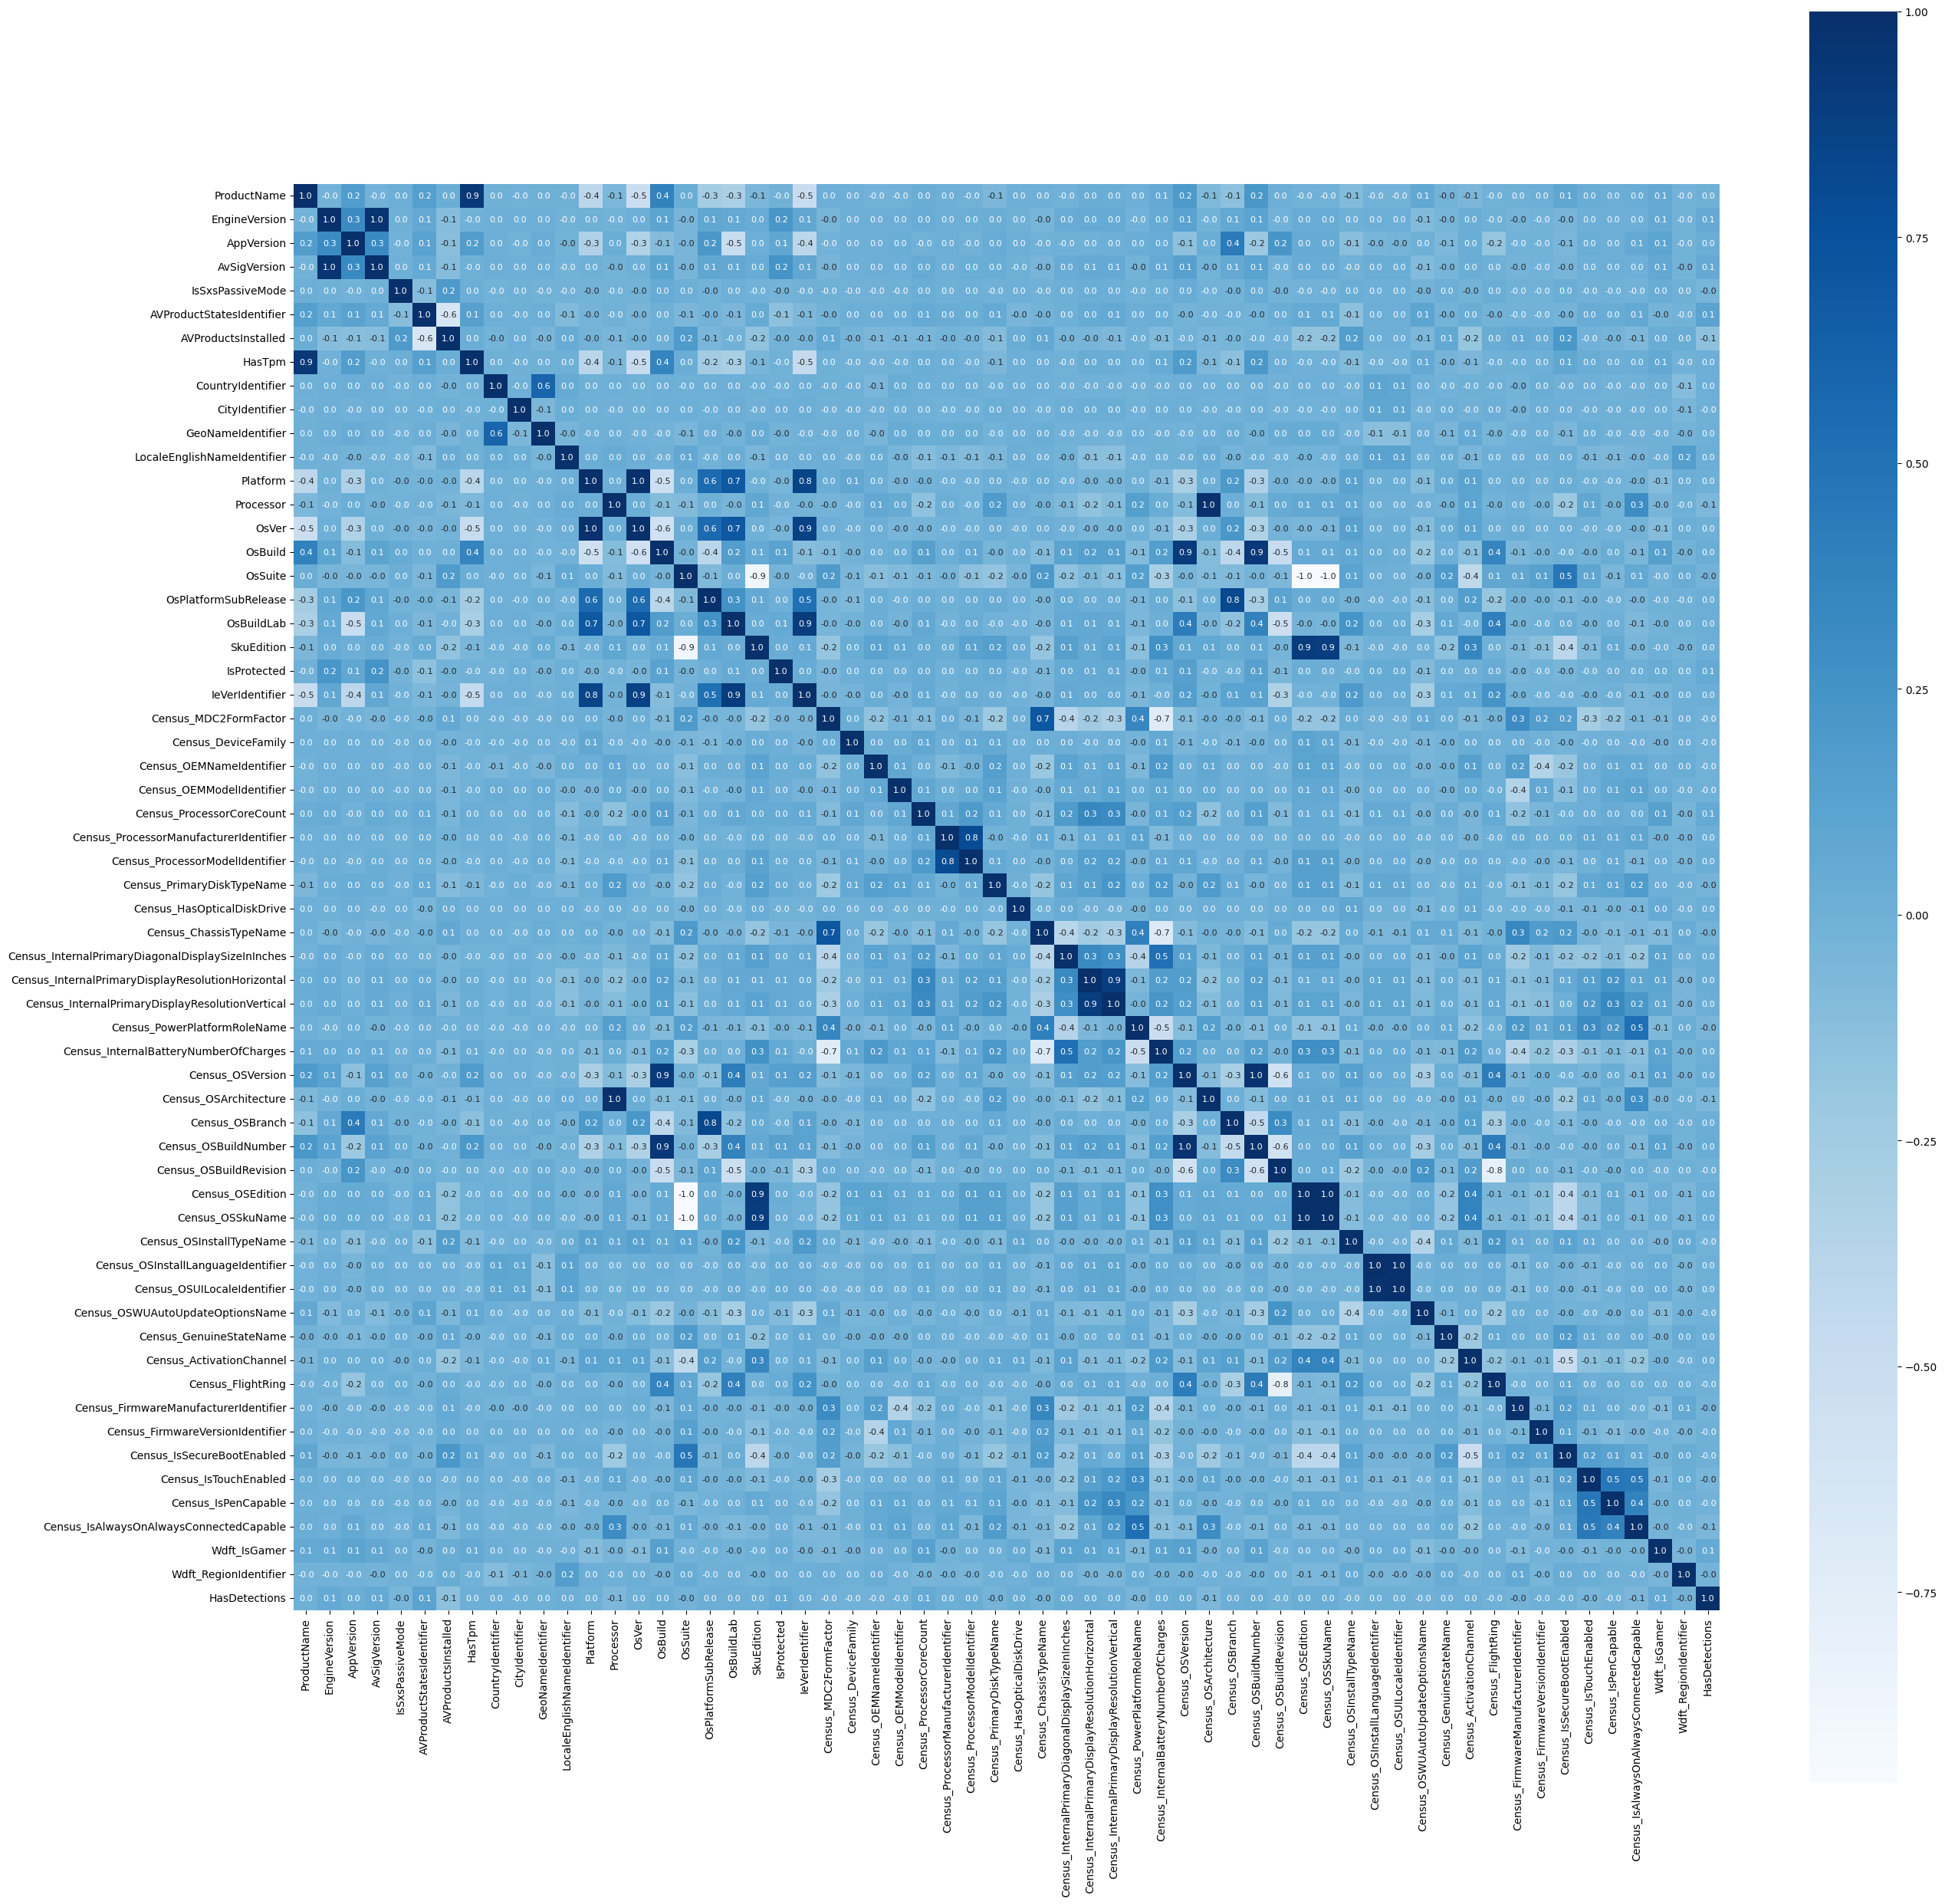

In [26]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
corr_with_target = correlation['HasDetections'].drop('HasDetections')
high_corr_features = corr_with_target[abs(corr_with_target) >= 0.04].index.tolist()

train_filtered=train[high_corr_features]


In [28]:
train_data_high_corr=train[high_corr_features+['HasDetections']]

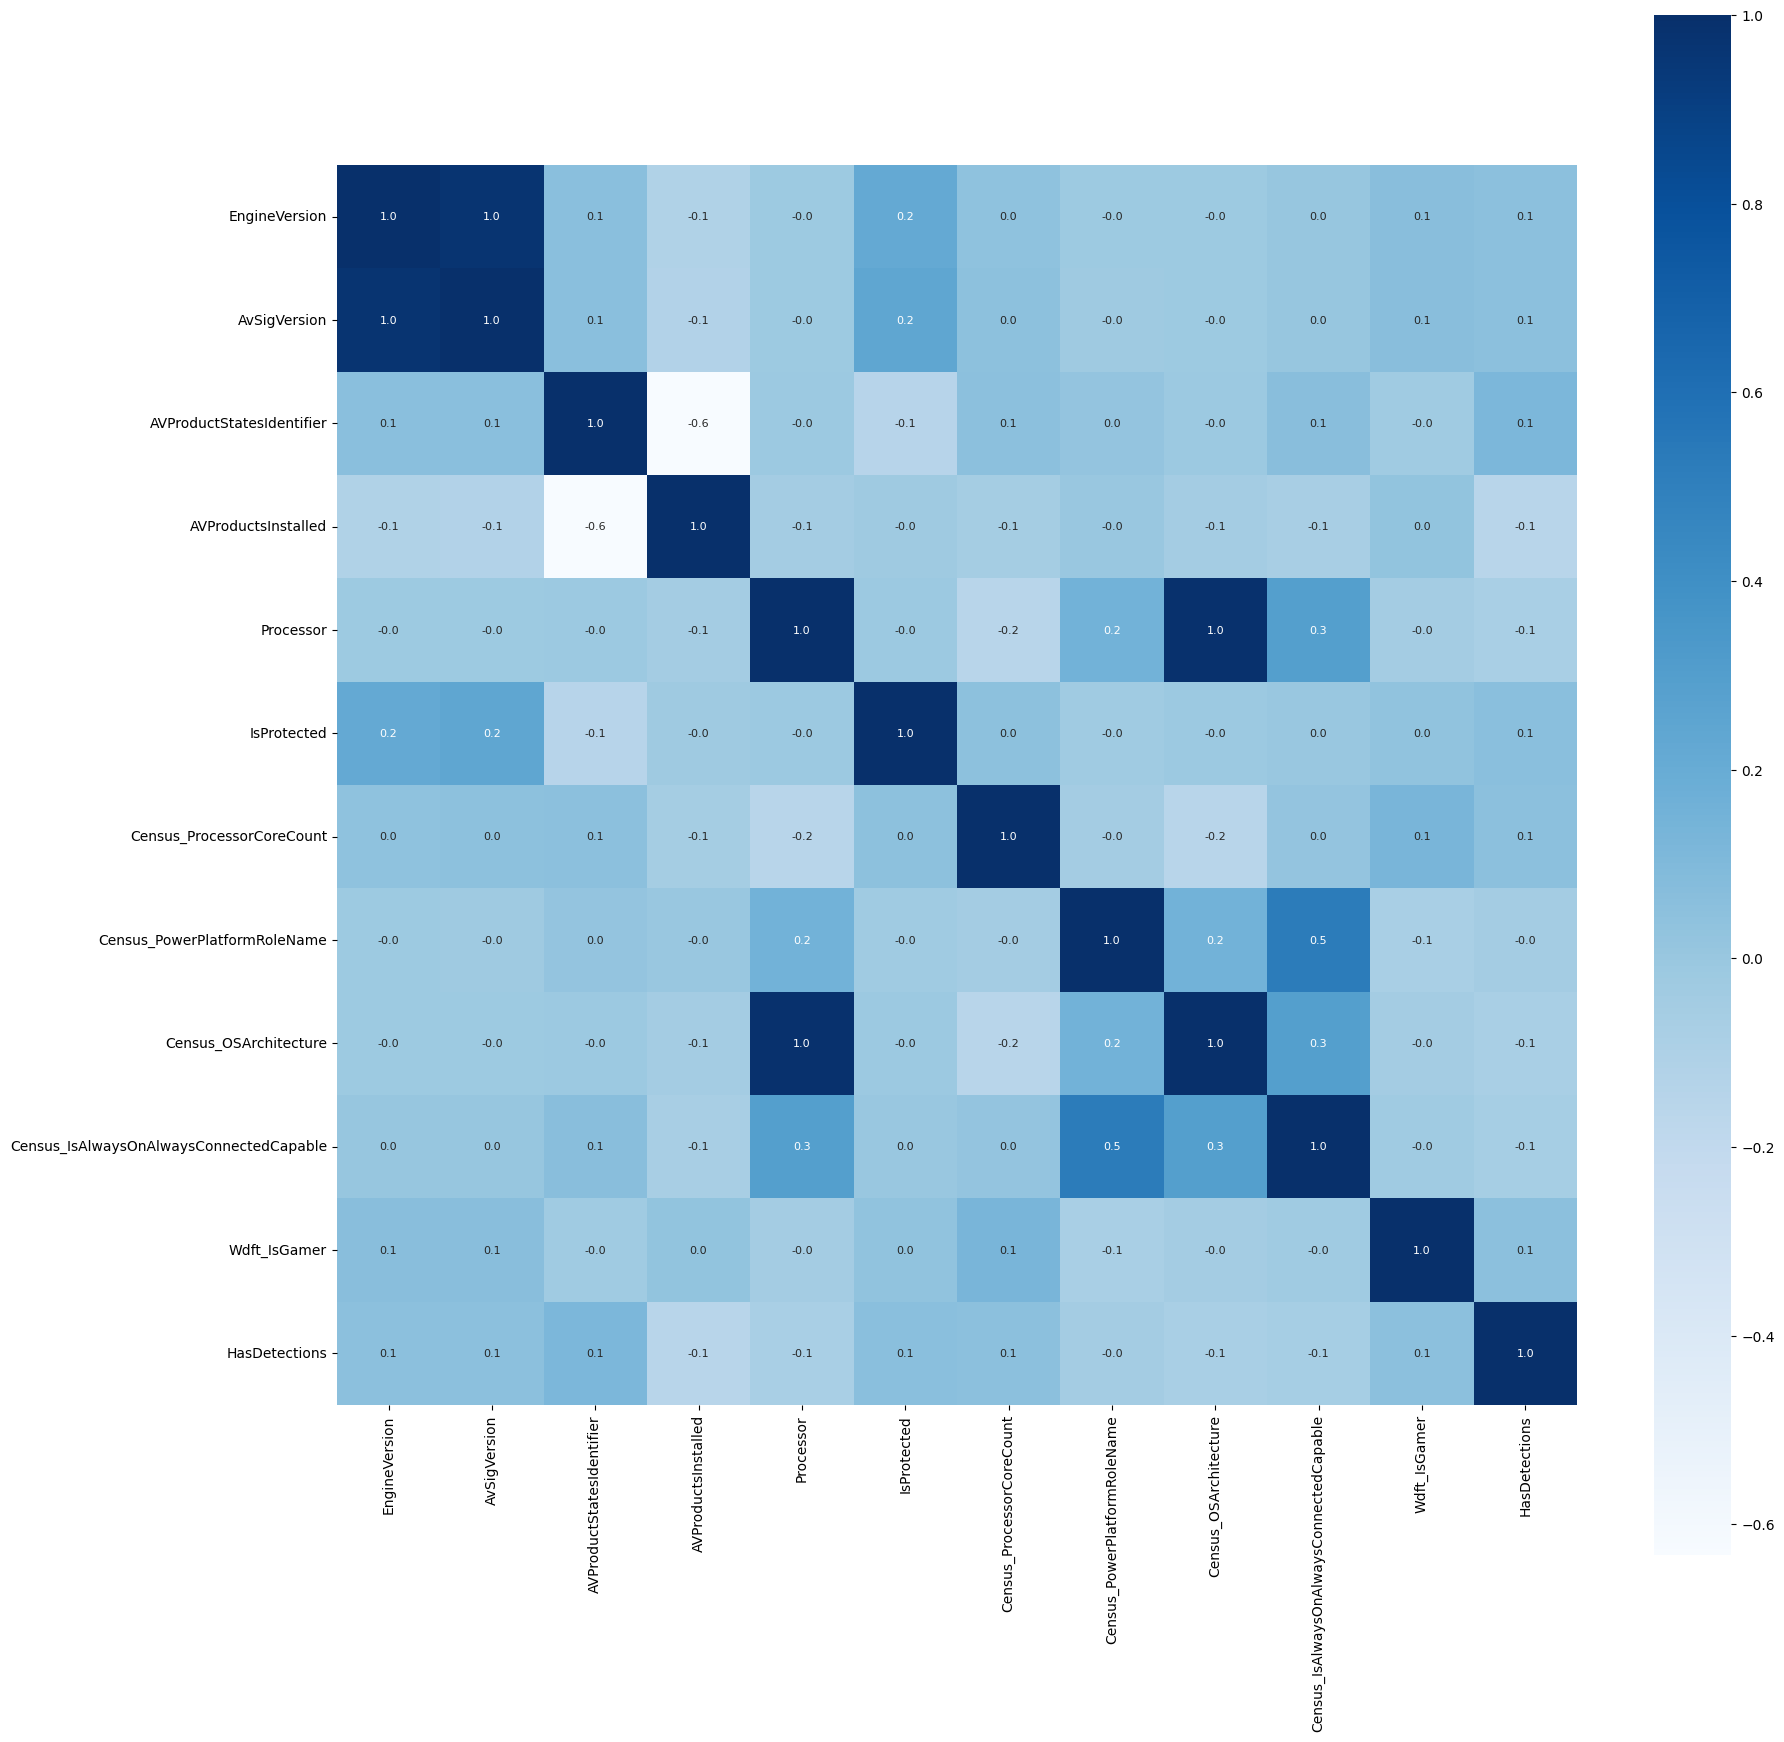

In [29]:
corr=train_data_high_corr.corr()

plt.figure(figsize=(20,20))
heatmap=sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [30]:
train_filtered

EngineVersion  AvSigVersion  AVProductStatesIdentifier  \
8427007             55          6457                    53447.0   
8829090             55          6476                    53447.0   
2731904             55          6798                    46781.0   
1359513             56          6978                    53447.0   
236059              56          7154                    47238.0   
...                ...           ...                        ...   
7652501             56          7022                    53447.0   
5714630             55          6627                    53447.0   
1916469             56          7331                    53447.0   
8209241             56          6860                    53447.0   
4963145             54          6187                    53447.0   

         AVProductsInstalled  Processor  IsProtected  \
8427007                  1.0          1          1.0   
8829090                  1.0          1          1.0   
2731904                  2.0          1          1.0   
1359513                  1.0          1          1.0   
236059                   2.0          1          1.0   
...                      ...        ...          ...   
7652501                  1.0          1          1.0   
5714630                  1.0          1          1.0   
1916469                  1.0          1          1.0   
8209241                  1.0          1          1.0   
4963145                  1.0          1          1.0   

         Census_ProcessorCoreCount  Census_PowerPlatformRoleName  \
8427007                        4.0                             1   
8829090                        4.0                             3   
2731904                        4.0                             3   
1359513                        8.0                             3   
236059                         4.0                             3   
...                            ...                           ...   
7652501                        8.0                             3   
5714630                        4.0                             3   
1916469                        8.0                             3   
8209241                        4.0                             1   
4963145                        4.0                             3   

         Census_OSArchitecture  Census_IsAlwaysOnAlwaysConnectedCapable  \
8427007                      0                                      0.0   
8829090                      0                                      0.0   
2731904                      0                                      0.0   
1359513                      0                                      0.0   
236059                       0                                      0.0   
...                        ...                                      ...   
7652501                      0                                      0.0   
5714630                      0                                      0.0   
1916469                      0                                      0.0   
8209241                      0                                      0.0   
4963145                      0                                      0.0   

         Wdft_IsGamer  
8427007           0.0  
8829090           1.0  
2731904           0.0  
1359513           0.0  
236059            1.0  
...               ...  
7652501           1.0  
5714630           0.0  
1916469           0.0  
8209241           1.0  
4963145           0.0  

[1000000 rows x 11 columns]

In [31]:
train_filtered.to_csv('features.csv', index=False)
from IPython.display import FileLink

# This will create a download link for the file
FileLink('features.csv')


/kaggle/working/features.csv

In [32]:
train_data_high_corr.to_csv('train_preprocessed_1m_row.csv', index=False)
from IPython.display import FileLink

# This will create a download link for the file
FileLink('train_preprocessed_1m_row.csv')

/kaggle/working/train_preprocessed_1m_row.csv

In [33]:
train_data_high_corr_100000=train_data_high_corr.sample(100000)
train_data_high_corr_100000.to_csv('train_preprocessed_100k_row.csv', index=False)
from IPython.display import FileLink

# This will create a download link for the file
FileLink('train_preprocessed_100k_row.csv')

/kaggle/working/train_preprocessed_100k_row.csv

## random forest

In [34]:

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression


In [35]:
target=train['HasDetections']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_filtered,target,test_size=0.2,shuffle=True,random_state=42)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Random Forest
pipeline_rf = Pipeline([
    ('Scaler', StandardScaler()),
    ('Random Forest',  RandomForestClassifier(max_depth=15, n_estimators=350, random_state=42))
     ])

In [38]:
pipeline_rf.fit(x_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Random Forest',
                 RandomForestClassifier(max_depth=15, n_estimators=350,
                                        random_state=42))])

In [39]:
pipeline_rf.score(x_test, y_test)

0.605875

In [40]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline_rf.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


ROC AUC Score: 0.6431


## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()


param_grid = {'n_neighbors': range(1, 31)}


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='roc_auc')

In [42]:
best_k = grid_search.best_params_['n_neighbors']
best_k
#best k is 30 

30

In [43]:
best_score = grid_search.best_score_

In [44]:
#best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn = KNeighborsClassifier(n_neighbors=31)
best_knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(x_test)
y_pred_prob = best_knn.predict_proba(x_test)[:, 1]

In [45]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC on Test Set: {roc_auc:.2f}')

ROC AUC on Test Set: 0.62


# light GBM

In [51]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', 
                      objective='binary', 
                      random_state=42)

In [46]:
""""
#light gbm hyper parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    'num_leaves': [31, 50, 70],
    'min_child_samples': [20, 30, 40]
}

grid_search_lgb = GridSearchCV(lgbm, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lgb.fit(x_train, y_train)

best_lightGBM_parameters = grid_search_lgb.best_params_['n_estimators','learning_rate','max_depth','num_leaves','min_child_samples']

# Predict on test set
y_pred_proba = grid_search_lgb.predict_proba(x_test)[:, 1]

# Evaluate using ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'LightGBM grid modefied ROC AUC Score: {roc_auc:.4f}')

#this code took 4 hours to run so we try another code 


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 319787, number of negative: 320213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.279916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 640000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499667 -> initscore=-0.001331
[LightGBM] [Info] Start training from score -0.001331
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 319787, number of negative: 320213
[LightGBM] [Info] Auto-choosing row-wise 

KeyboardInterrupt: 

In [ ]:
""""
# Predict on test set
y_pred_proba = grid_search_lgb.predict_proba(x_test)[:, 1]

# Evaluate using ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'LightGBM grid modefied ROC AUC Score: {roc_auc:.4f}')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_search_lgb = RandomizedSearchCV(
    lgbm, 
    param_distributions=param_grid, 
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=42
)
random_search_lgb.fit(x_train, y_train)

best_lightGBM_parameters = random_search_lgb.best_params_

lgbm.set_params(early_stopping_rounds=10)
grid_search_lgb = GridSearchCV(lgbm, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lgb.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='auc')


In [53]:
# If not using GridSearchCV, train the default LGBMClassifier
lgbm.fit(x_train, y_train)

# Predict on test set
y_pred_proba = lgbm.predict_proba(x_test)[:, 1]

# Evaluate using ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'LightGBM ROC AUC Score: {roc_auc:.4f}')


[LightGBM] [Info] Number of positive: 399734, number of negative: 400266
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499667 -> initscore=-0.001330
[LightGBM] [Info] Start training from score -0.001330
LightGBM ROC AUC Score: 0.6450


## stacking

In [56]:
from sklearn.ensemble import StackingClassifier
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(
    estimators=[
        
        ('pipeline_rf', pipeline_rf),
        ('best_knn', best_knn),
        ('lightGMB', lgbm)
       
    ],
    final_estimator=meta_model,
    cv=5,  # Cross-validation splitting strategy
    stack_method='auto'  # Use 'predict_proba' or 'decision_function' when applicable
)

# Train the stacking classifier
stacking_clf.fit(x_train, y_train)

# Predict probabilities on the test set
y_pred_proba = stacking_clf.predict_proba(x_test)[:, 1]

# Evaluate using ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Stacking Model ROC AUC Score: {roc_auc:.4f}')

[LightGBM] [Info] Number of positive: 399734, number of negative: 400266
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499667 -> initscore=-0.001330
[LightGBM] [Info] Start training from score -0.001330
[LightGBM] [Info] Number of positive: 319787, number of negative: 320213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 640000, number of used features: 11
[LightGBM] [In

In [57]:
sample_submission=pd.read_csv('/kaggle/input/microsoft-malware-prediction/sample_submission.csv',low_memory=False)

In [58]:
test=pd.read_csv('/kaggle/input/microsoft-malware-prediction/test.csv',low_memory=False)

In [60]:
train_columns = train_filtered.columns
test = test[train_columns]

In [61]:
test.isna().sum()

EngineVersion                                   0
AvSigVersion                                    0
AVProductStatesIdentifier                   23767
AVProductsInstalled                         23767
Processor                                       0
IsProtected                                 23649
Census_ProcessorCoreCount                   61277
Census_PowerPlatformRoleName                   26
Census_OSArchitecture                           0
Census_IsAlwaysOnAlwaysConnectedCapable     90152
Wdft_IsGamer                               302857
dtype: int64

In [68]:
columns_mode_test = ['AVProductStatesIdentifier','AVProductsInstalled','Census_IsAlwaysOnAlwaysConnectedCapable',
                'Census_ProcessorCoreCount','IsProtected','Wdft_IsGamer','Census_PowerPlatformRoleName']

In [69]:
test.loc[:, columns_mode_test] = mode_imputer.fit_transform(test[columns_mode_test])

In [70]:
test.head()

EngineVersion AvSigVersion  AVProductStatesIdentifier  AVProductsInstalled  \
0   1.1.15400.5  1.281.501.0                    53447.0                  1.0   
1   1.1.15400.4  1.279.301.0                    53447.0                  1.0   
2   1.1.15300.6  1.277.230.0                    49480.0                  2.0   
3   1.1.15400.5  1.281.664.0                    42160.0                  2.0   
4   1.1.15400.4  1.279.236.0                    53447.0                  1.0   

  Processor  IsProtected  Census_ProcessorCoreCount  \
0       x64          1.0                        4.0   
1       x64          1.0                        4.0   
2       x64          1.0                        2.0   
3       x64          1.0                        2.0   
4       x64          1.0                        4.0   

  Census_PowerPlatformRoleName Census_OSArchitecture  \
0                       Mobile                 amd64   
1                       Mobile                 amd64   
2                       Mobile                 amd64   
3                       Mobile                 amd64   
4                       Mobile                 amd64   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  
0                                      0.0           0.0  
1                                      0.0           1.0  
2                                      0.0           1.0  
3                                      0.0           0.0  
4                                      0.0           1.0

In [71]:
test.isna().sum()

EngineVersion                              0
AvSigVersion                               0
AVProductStatesIdentifier                  0
AVProductsInstalled                        0
Processor                                  0
IsProtected                                0
Census_ProcessorCoreCount                  0
Census_PowerPlatformRoleName               0
Census_OSArchitecture                      0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
dtype: int64

In [73]:
cat_to_int(test)

/tmp/ipykernel_34/3401386176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
/tmp/ipykernel_34/3401386176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
/tmp/ipykernel_34/3401386176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

EngineVersion  AvSigVersion  AVProductStatesIdentifier  \
0                   68          9261                    53447.0   
1                   67          9005                    53447.0   
2                   65          8501                    49480.0   
3                   68          9301                    42160.0   
4                   67          8989                    53447.0   
...                ...           ...                        ...   
7853248             68          9205                    53447.0   
7853249             68          9226                    53447.0   
7853250             68          9205                    68585.0   
7853251             67          8881                    53447.0   
7853252             68          9343                    53447.0   

         AVProductsInstalled  Processor  IsProtected  \
0                        1.0          1          1.0   
1                        1.0          1          1.0   
2                        2.0          1          1.0   
3                        2.0          1          1.0   
4                        1.0          1          1.0   
...                      ...        ...          ...   
7853248                  1.0          1          1.0   
7853249                  1.0          1          1.0   
7853250                  2.0          1          1.0   
7853251                  1.0          2          1.0   
7853252                  1.0          1          1.0   

         Census_ProcessorCoreCount  Census_PowerPlatformRoleName  \
0                              4.0                             3   
1                              4.0                             3   
2                              2.0                             3   
3                              2.0                             3   
4                              4.0                             3   
...                            ...                           ...   
7853248                        4.0                             3   
7853249                        4.0                             3   
7853250                        8.0                             3   
7853251                        4.0                             3   
7853252                        2.0                             3   

         Census_OSArchitecture  Census_IsAlwaysOnAlwaysConnectedCapable  \
0                            0                                      0.0   
1                            0                                      0.0   
2                            0                                      0.0   
3                            0                                      0.0   
4                            0                                      0.0   
...                        ...                                      ...   
7853248                      0                                      0.0   
7853249                      0                                      0.0   
7853250                      0                                      0.0   
7853251                      2                                      0.0   
7853252                      0                                      0.0   

         Wdft_IsGamer  
0                 0.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 1.0  
...               ...  
7853248           0.0  
7853249           0.0  
7853250           1.0  
7853251           0.0  
7853252           0.0  

[7853253 rows x 11 columns]

In [74]:
predictions = stacking_clf.predict_proba(test)[:, 1]  

sample_submission['HasDetections'] = predictions


In [76]:
# Save the predictions in the correct format for submission
sample_submission.to_csv('submission_stacking.csv', index=False)
FileLink('submission_stacking.csv')

/kaggle/working/submission_stacking.csv

In [77]:
!kaggle competitions submit -c Microsoft Malware Prediction -f submission_stacking.csv -m "Stacking model submission"


Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
